# LOGISTIC REGRESSION

### This notebook implements a simple Logistic Regression algorithm to analyze the probability of an employee leaving the company.

Find original dataset [here at Kaggle](https://www.kaggle.com/datasets/giripujar/hr-analytics)

# 1.0 Load Dataset

In [23]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [24]:
### IMPORTANT! ###

# Upload the dataset file before executing this cell
# 'HR_comma_sep.csv' in original ZIP at Kaggle

#load dataset from CSV file
df = pd.read_csv('HR_comma_sep.csv')

## 1.1 Check DataFrame basic info

In [25]:
#analyze dataframe basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [26]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [27]:
#check if there are any NaN values
df.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [28]:
#'left' is the label of this dataset
#calculate 'left' rate within the company
left_rate = df['left'].mean() * 100

print(f'Employees leaving probability is {left_rate.round(1)} %')

Employees leaving probability is 23.8 %


# 2.0 Visualize and Analyze dataset
This will help us to get some intuitions about the dataset

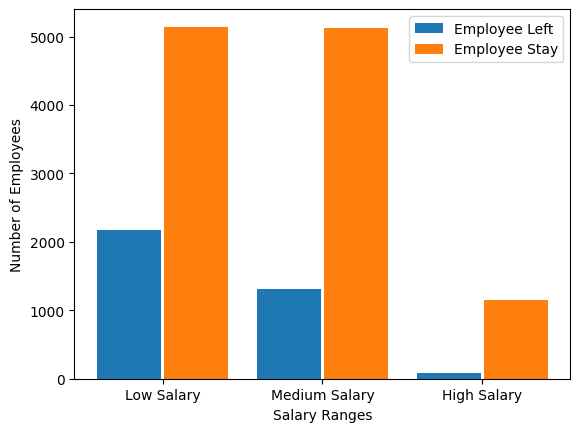

In [29]:
#comparing employees staying vs. leaving based on ther salary range

import numpy as np

X = ['Low Salary', 'Medium Salary', 'High Salary']
low_left = df.loc[(df['left'] == 1) & (df['salary'] == 'low')].copy()
low_stay = df.loc[(df['left'] == 0) & (df['salary'] == 'low')].copy()
med_left = df.loc[(df['left'] == 1) & (df['salary'] == 'medium')].copy()
med_stay = df.loc[(df['left'] == 0) & (df['salary'] == 'medium')].copy()
high_left = df.loc[(df['left'] == 1) & (df['salary'] == 'high')].copy()
high_stay = df.loc[(df['left'] == 0) & (df['salary'] == 'high')].copy()
emp_left = [len(low_left), len(med_left), len(high_left)]
emp_stay = [len(low_stay), len(med_stay), len(high_stay)]

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.21, emp_left, 0.4, label = 'Employee Left')
plt.bar(X_axis + 0.21, emp_stay, 0.4, label = 'Employee Stay')

plt.xticks(X_axis, X)
plt.xlabel("Salary Ranges")
plt.ylabel("Number of Employees")
plt.legend()
plt.show()

<Axes: >

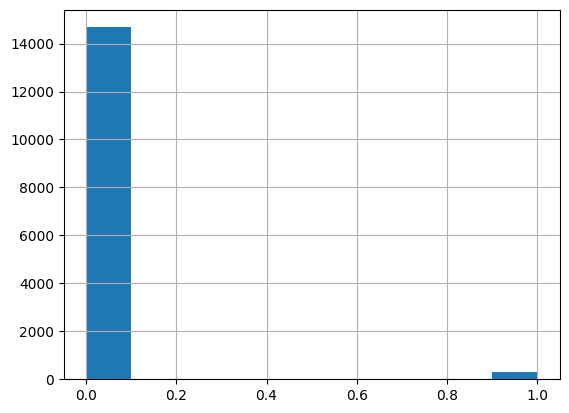

In [30]:
df['promotion_last_5years'].hist()

<Axes: >

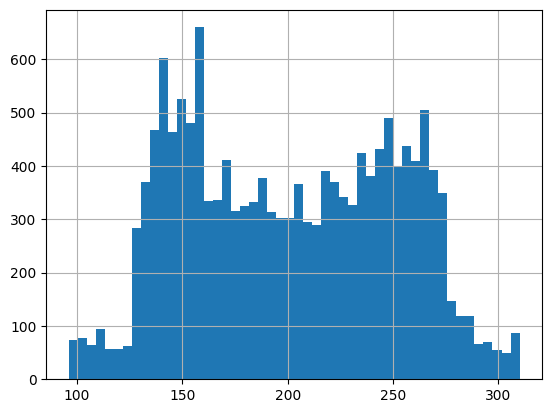

In [31]:
df['average_montly_hours'].hist(bins=50)

<Axes: >

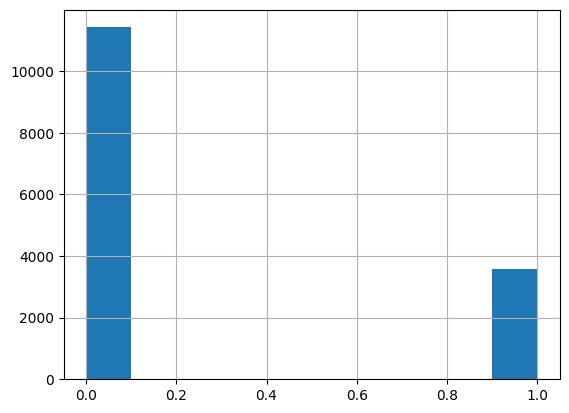

In [32]:
#lets check proportion of employees leaving in the dataset
df['left'].hist()

# 3.0 Prepare dataset

### 3.1 Transform categorical columns into numerical columns

In [33]:
df_factorized = df.copy()
df_factorized['department_encoded'] , department_categories = df_factorized['Department'].factorize()

In [34]:
df_factorized['salary_encoded'] , salaries_categories = df_factorized['salary'].factorize()

In [35]:
df_factorized.drop(['Department', 'salary'], axis='columns', inplace=True)

In [36]:
df_factorized.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_encoded,salary_encoded
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


### 3.2 Split dataset

In [37]:
#split dataset into:
# 60% train set
# 20% evaluation set
# 20% test set
#in addition, we stratify 'left' feature, because samples with employee leaving
#are way less than samples with employee dont leaving the company

train_set, test_set = train_test_split(df_factorized, train_size=0.6, stratify=df['left'])
eval_set, test_set = train_test_split(test_set, test_size=0.5, stratify=test_set['left'])

In [38]:
x_train = train_set.drop(['left'], axis='columns')
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8999 entries, 5999 to 10108
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     8999 non-null   float64
 1   last_evaluation        8999 non-null   float64
 2   number_project         8999 non-null   int64  
 3   average_montly_hours   8999 non-null   int64  
 4   time_spend_company     8999 non-null   int64  
 5   Work_accident          8999 non-null   int64  
 6   promotion_last_5years  8999 non-null   int64  
 7   department_encoded     8999 non-null   int64  
 8   salary_encoded         8999 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 703.0 KB


In [39]:
x_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_encoded,salary_encoded
5999,0.78,0.98,4,260,3,0,0,3,0
2663,0.54,0.94,5,229,3,1,0,7,0
9627,0.95,0.86,2,263,4,0,0,0,1
14255,0.09,0.89,6,276,4,0,0,3,0
4619,0.69,0.64,4,200,3,0,0,3,1


In [40]:
y_train = train_set['left']
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 8999 entries, 5999 to 10108
Series name: left
Non-Null Count  Dtype
--------------  -----
8999 non-null   int64
dtypes: int64(1)
memory usage: 140.6 KB


In [41]:
y_train.head()

5999     0
2663     0
9627     0
14255    1
4619     0
Name: left, dtype: int64

# 4.0 Build Logistic Regressión Model

In [51]:
#max_iter incresead, default=100
model = LogisticRegression(max_iter=500)

In [52]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [53]:
#split evaluation data
x_eval = eval_set.drop(['left'], axis='columns')
x_eval.info()
y_eval = eval_set['left']
y_eval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 9155 to 8233
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     3000 non-null   float64
 1   last_evaluation        3000 non-null   float64
 2   number_project         3000 non-null   int64  
 3   average_montly_hours   3000 non-null   int64  
 4   time_spend_company     3000 non-null   int64  
 5   Work_accident          3000 non-null   int64  
 6   promotion_last_5years  3000 non-null   int64  
 7   department_encoded     3000 non-null   int64  
 8   salary_encoded         3000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 234.4 KB
<class 'pandas.core.series.Series'>
Int64Index: 3000 entries, 9155 to 8233
Series name: left
Non-Null Count  Dtype
--------------  -----
3000 non-null   int64
dtypes: int64(1)
memory usage: 46.9 KB


In [54]:
model.score(x_eval, y_eval)

0.785

# 5.0 Test the model

In [55]:
#split test data
x_test = test_set.drop(['left'], axis='columns')
x_test.info()
y_test = test_set['left']
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 2670 to 2968
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     3000 non-null   float64
 1   last_evaluation        3000 non-null   float64
 2   number_project         3000 non-null   int64  
 3   average_montly_hours   3000 non-null   int64  
 4   time_spend_company     3000 non-null   int64  
 5   Work_accident          3000 non-null   int64  
 6   promotion_last_5years  3000 non-null   int64  
 7   department_encoded     3000 non-null   int64  
 8   salary_encoded         3000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 234.4 KB
<class 'pandas.core.series.Series'>
Int64Index: 3000 entries, 2670 to 2968
Series name: left
Non-Null Count  Dtype
--------------  -----
3000 non-null   int64
dtypes: int64(1)
memory usage: 46.9 KB


In [56]:
x_test.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_encoded,salary_encoded
2670,0.75,0.73,4,274,2,0,0,9,0
5610,0.52,0.68,3,162,4,1,0,3,0
7628,0.89,0.50,2,238,4,0,0,9,0
11776,0.76,0.56,3,179,3,1,0,0,0
11673,0.93,0.60,3,188,3,0,0,8,2


In [57]:
y_test.head(5)

2670     0
5610     0
7628     0
11776    0
11673    0
Name: left, dtype: int64

In [58]:
prediction = model.predict(x_test)

In [59]:
prediction

array([0, 0, 0, ..., 1, 0, 1])